In [1]:
%matplotlib inline

# Introduction to NLP with NLTK

Natural Language Processing (NLP) is often taught at the academic level from the perspective of computational linguists. However, as data scientists, we have a richer view of the natural language world - unstructured data that by its very nature has latent information that is important to humans. NLP practioners have benefited from machine learning techniques to unlock meaning from large corpora, and in this class we’ll explore how to do that particularly with Python and with the Natural Language Toolkit (NLTK). 

NLTK is an excellent library for machine-learning based NLP, written in Python by experts from both academia and industry. Python allows you to create rich data applications rapidly, iterating on hypotheses. The combination of Python + NLTK means that you can easily add language-aware data products to your larger analytical workflows and applications. 

## Quick Overview of NLTK
NLTK stands for the Natural Language Toolkit and is written by two eminent computational linguists, Steven Bird (Senior Research Associate of the LDC and professor at the University of Melbourne) and Ewan Klein (Professor of Linguistics at Edinburgh University). NTLK provides a combination of natural language corpora, lexical resources, and example grammars with language processing algorithms, methodologies and demonstrations for a very pythonic "batteries included" view of Natural Language Processing.   

As such, NLTK is perfect for researh driven (hypothesis driven) workflows for agile data science. Its suite of libraries includes:

- tokenization, stemming, and tagging
- chunking and parsing
- language modeling
- classification and clustering
- logical semantics

NLTK is a useful pedagogical resource for learning NLP with Python and serves as a starting place for producing production grade code that requires natural language analysis. It is also important to understand what NLTK is _not_:

- Production ready out of the box
- Lightweight
- Generally applicable
- Magic

NLTK provides a variety of tools that can be used to explore the linguistic domain but is not a lightweight dependency that can be easily included in other workflows, especially those that require unit and integration testing or other build processes. This stems from the fact that NLTK includes a lot of added code but also a rich and complete library of corpora that power the built-in algorithms. 

### The Good parts of NLTK

- Preprocessing
    - segmentation
    - tokenization
    - PoS tagging
- Word level processing
    - WordNet
    - Lemmatization
    - Stemming
    - NGrams
- Utilities
    - Tree
    - FreqDist
    - ConditionalFreqDist
    - Streaming CorpusReaders
- Classification
    - Maximum Entropy
    - Naive Bayes
    - Decision Tree
- Chunking
- Named Entity Recognition
- Parsers Galore!

### The Bad parts of NLTK

- Syntactic Parsing

    - No included grammar (not a black box)
    - No Feature/Dependency Parsing
    - No included feature grammar

- The sem package
    
    - Toy only (lambda-calculus & first order logic)

- Lots of extra stuff (heavyweight dependency)

    - papers, chat programs, alignments, etc.

Knowing the good and the bad parts will help you explore NLTK further - looking into the source code to extract the material you need, then moving that code to production. We will explore NLTK in more detail in the rest of this notebook. 

## Installing NLTK

This notebook has a few dependencies, most of which can be installed via the python package manger - `pip`. 

1. Python 2.7 or later (anaconda is ok)
2. NLTK
3. The NLTK corpora 
4. The BeautifulSoup library
5. The gensim libary

Once you have Python and pip installed you can install NLTK as follows:

    ~$ pip install nltk
    
    ~$ pip install matplotlib
    
    ~$ pip install beautifulsoup4
    
    ~$ pip install gensim

Note that these will also install Numpy and Scipy if they aren't already installed. 

To download the corpora, open a python interperter:


In [2]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

This will open up a window with which you can download the various corpora and models to a specified location. For now, go ahead and download it all as we will be exploring as much of NLTK as we can. Also take note of the `download_directory` - you're going to want to know where that is so you can get a detailed look at the corpora that's included. I usually export an enviornment variable to track this:

    ~$ export NLTK_DATA=/path/to/nltk_data
    
_Take a moment to explore what is in this directory_

## Working with Example Corpora

NLTK ships with a variety of corpora, let's use a few of them to do some work. Get access to the text from _Moby Dick_ as follows:

In [4]:
moby = nltk.text.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))

The `nltk.text.Text` class is a wrapper around a sequence of simple (string) tokens - intended only for _the initial exploration of text_ usually via the Python REPL. It has the following methods:

- common_contexts
- concordance
- collocations
- count
- plot
- findall
- index

You shouldn't use this class in production level systems, but it is useful to explore (small) snippets of text in a meaningful fashion.

The corcordance function performs a search for the given token and then also provides the surrounding context:


In [5]:
moby.concordance("monstrous", 55, lines=10)

Displaying 10 of 11 matches:
er , one was of a most monstrous size . ... This came t
ALMS . " Touching that monstrous bulk of the whale or o
 a heathenish array of monstrous clubs and spears . Som
ed , and wondered what monstrous cannibal and savage co
vived the flood ; most monstrous and most mountainous !
cout at Moby Dick as a monstrous fable , or still worse
 .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I
 In connexion with the monstrous pictures of whales , I
 upon those still more monstrous stories of them which 
n rummaged out of this monstrous cabinet there is no te


Given some context surrounding a word, we can discover similar words, e.g. words that occur frequently in the same context and with a similar distribution: Distributional similarity: 

In [8]:
moby.similar("ahab") # Captain Ahab is a fictional character in Herman Melville's Moby-Dick 
# austen = nltk.text.Text(nltk.corpus.gutenberg.words('austen-sense.txt'))
# print(austen.similar("monstrous"))

it he that queequeg stubb him there starbuck i what man and all then
this me peleg which here you


As you can see, this takes a bit of time to build the index in memory, one of the reasons it's not suggested to use this class in production code. Now that we can do searching and similarity, find the common contexts of a set of words:

In [9]:
moby.common_contexts(["ahab", "starbuck"]) # Starbuck, the young chief mate of the Pequod, is a thoughtful and intellectual Quaker from Nantucket. 

of_s to_the cried_give with_the murmured_gazing at_s to_s and_s
cried_let cried_look by_s of_and in_the but_s cried_to


NLTK also uses matplotlib and pylab to display graphs and charts that can show dispersions and frequency. This is especially interesting for the corpus of innagural addresses given by U.S. presidents.

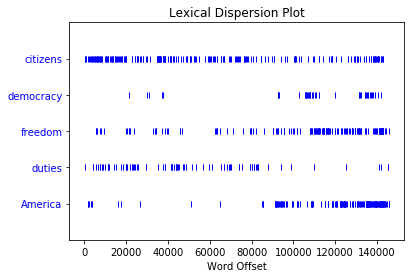

In [10]:
inaugural = nltk.text.Text(nltk.corpus.inaugural.words())
inaugural.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

To explore much of the built in corpus, use the following methods:

In [12]:
# Lists the various corpora and CorpusReader classes in the nltk.corpus module
for name in dir(nltk.corpus):
    if name.islower() and not name.startswith('_'):
        print(name)

abc
alpino
brown
cess_cat
cess_esp
cmudict
comparative_sentences
comtrans
conll2000
conll2002
conll2007
crubadan
demo
dependency_treebank
find_corpus_fileids
floresta
framenet
framenet15
gazetteers
genesis
gutenberg
ieer
inaugural
indian
jeita
knbc
lin_thesaurus
mac_morpho
machado
masc_tagged
movie_reviews
multext_east
names
nombank
nombank_ptb
nonbreaking_prefixes
nps_chat
opinion_lexicon
perluniprops
ppattach
product_reviews_1
product_reviews_2
propbank
propbank_ptb
pros_cons
ptb
qc
re
reader
reuters
rte
semcor
senseval
sentence_polarity
sentiwordnet
shakespeare
sinica_treebank
state_union
stopwords
subjectivity
swadesh
swadesh110
swadesh207
switchboard
tagged_treebank_para_block_reader
teardown_module
timit
timit_tagged
toolbox
treebank
treebank_chunk
treebank_raw
twitter_samples
udhr
udhr2
universal_treebanks
util
verbnet
webtext
wordnet
wordnet_ic
words


In [13]:
# For a specific corpus, list the fileids that are available:
print(nltk.corpus.shakespeare.fileids())

['a_and_c.xml', 'dream.xml', 'hamlet.xml', 'j_caesar.xml', 'macbeth.xml', 'merchant.xml', 'othello.xml', 'r_and_j.xml']


In [ ]:
print(nltk.corpus.gutenberg.fileids())

In [15]:
print(nltk.corpus.stopwords.fileids())
print(nltk.corpus.stopwords.words('english'))
import string
print(string.punctuation)

['arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'kazakh', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 

These corpora export several vital methods:

- paras (iterate through each paragraph)
- sents (iterate through each sentence)
- words (iterate through each word)
- raw   (get access to the raw text)

In [16]:
corpus = nltk.corpus.brown
print(corpus.paras())

[[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']], [['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']], ...]


In [17]:
print(corpus.sents())

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


In [18]:
print(corpus.words())

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [19]:
print(corpus.raw()[:200])



	The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' tha


## Frequency Analyses

In statistical machine learning approaches to NLP, the very first thing we need to do is count things - especially the unigrams that appear in the text and their relationships to each other. NLTK provides two very excellent classes to enable these frequency analyses:

- `FreqDist`
- `ConditionalFreqDist` 

And these two classes serve as the foundation for most of the probability and statistical analyses that we will conduct.

First we will compute the following:

- The count of words
- The vocabulary (unique words)
- The lexical diversity (the ratio of word count to vocabulary)

In [20]:
reuters = nltk.corpus.reuters # Corpus of news articles
counts  = nltk.FreqDist(reuters.words())
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 41600 types and 1720901 tokens for a lexical diversity of 41.368


In [21]:
counts.B()

41600

In [22]:
print(counts.most_common(40))  # The n most common tokens in the corpus

[('.', 94687), (',', 72360), ('the', 58251), ('of', 35979), ('to', 34035), ('in', 26478), ('said', 25224), ('and', 25043), ('a', 23492), ('mln', 18037), ('vs', 14120), ('-', 13705), ('for', 12785), ('dlrs', 11730), ("'", 11272), ('The', 10968), ('000', 10277), ('1', 9977), ('s', 9298), ('pct', 9093), ('it', 8842), (';', 8762), ('&', 8698), ('lt', 8694), ('on', 8556), ('from', 7986), ('cts', 7953), ('is', 7580), ('>', 7449), ('that', 7377), ('its', 7265), ('by', 6872), ('"', 6816), ('at', 6537), ('2', 6528), ('U', 6388), ('S', 6382), ('year', 6310), ('be', 6288), ('with', 5945)]


In [23]:
print(counts.max()) # The most frequent token in the corpus

.


In [24]:
print(counts.hapaxes()[0:10])  # If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes

['RIFT', 'Mounting', 'inflict', 'Move', 'Unofficial', 'Sheen', 'Safe', 'avowed', 'VERMIN', 'EAT']


In [27]:
counts.freq('stipulate') * 100 # percentage of the corpus for this token

5.810909517746808e-05

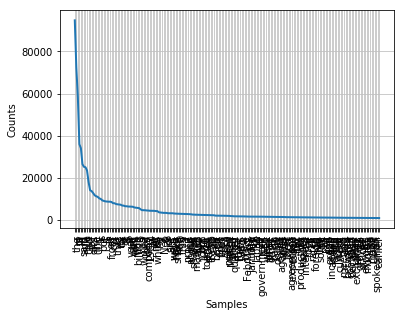

In [28]:
counts.plot(200, cumulative=False)

In [31]:
from itertools import chain 

brown = nltk.corpus.brown
categories = brown.categories()

counts = nltk.ConditionalFreqDist(chain(*[[(cat, word) for word in brown.words(categories=cat)] for cat in categories]))

for category, dist in counts.items():
    vocab  = len(dist.keys())
    tokens = sum(dist.values())
    lexdiv = float(tokens) / float(vocab)
    print("%s: %i types with %i tokens and lexical diversity of %0.3f" % (category, vocab, tokens, lexdiv))

adventure: 8874 types with 69342 tokens and lexical diversity of 7.814
belles_lettres: 18421 types with 173096 tokens and lexical diversity of 9.397
editorial: 9890 types with 61604 tokens and lexical diversity of 6.229
fiction: 9302 types with 68488 tokens and lexical diversity of 7.363
government: 8181 types with 70117 tokens and lexical diversity of 8.571
hobbies: 11935 types with 82345 tokens and lexical diversity of 6.899
humor: 5017 types with 21695 tokens and lexical diversity of 4.324
learned: 16859 types with 181888 tokens and lexical diversity of 10.789
lore: 14503 types with 110299 tokens and lexical diversity of 7.605
mystery: 6982 types with 57169 tokens and lexical diversity of 8.188
news: 14394 types with 100554 tokens and lexical diversity of 6.986
religion: 6373 types with 39399 tokens and lexical diversity of 6.182
reviews: 8626 types with 40704 tokens and lexical diversity of 4.719
romance: 8452 types with 70022 tokens and lexical diversity of 8.285
science_fiction: 

n grams:


In [30]:
for ngram in nltk.ngrams(["The", "bear", "walked", "in", "the", "woods", "at", "midnight"], 5):
    print(ngram)

    

('The', 'bear', 'walked', 'in', 'the')
('bear', 'walked', 'in', 'the', 'woods')
('walked', 'in', 'the', 'woods', 'at')
('in', 'the', 'woods', 'at', 'midnight')


## Preprocessing Text

NLTK is great at the preprocessing of Raw text - it provides the following tools for dividing text into it's constituent parts:

- `sent_tokenize`: a Punkt sentence tokenizer:

    This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.  It must be trained on a large collection of plaintext in the target language before it can be used.
    
    However, Punkt is designed to learn parameters (a list of abbreviations, etc.) unsupervised from a corpus similar to the target domain. The pre-packaged models may therefore be unsuitable: use PunktSentenceTokenizer(text) to learn parameters from the given text.
    
    
- `word_tokenize`: a Treebank tokenizer 

    The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank. This is the method that is invoked by ``word_tokenize()``.  It assumes that the text has already been segmented into sentences, e.g. using ``sent_tokenize()``.
    

- `pos_tag`: a maximum entropy tagger trained on the Penn Treebank

    There are several other taggers including (notably) the BrillTagger as well as the BrillTrainer to train your own tagger or tagset. 

In [3]:
text = "Medical personnel returning to New York and New Jersey from the Ebola-riddled countries in West Africa will be automatically quarantined if they had direct contact with an infected person, officials announced Friday. New York Gov. Andrew Cuomo (D) and New Jersey Gov. Chris Christie (R) announced the decision at a joint news conference Friday at 7 World Trade Center. “We have to do more,” Cuomo said. “It’s too serious of a situation to leave it to the honor system of compliance.” They said that public-health officials at John F. Kennedy and Newark Liberty international airports, where enhanced screening for Ebola is taking place, would make the determination on who would be quarantined. Anyone who had direct contact with an Ebola patient in Liberia, Sierra Leone or Guinea will be quarantined. In addition, anyone who traveled there but had no such contact would be actively monitored and possibly quarantined, authorities said. This news came a day after a doctor who had treated Ebola patients in Guinea was diagnosed in Manhattan, becoming the fourth person diagnosed with the virus in the United States and the first outside of Dallas. And the decision came not long after a health-care worker who had treated Ebola patients arrived at Newark, one of five airports where people traveling from West Africa to the United States are encountering the stricter screening rules."
print(text + '\n \n')

for sent in nltk.sent_tokenize(text): 
    print(sent)

Medical personnel returning to New York and New Jersey from the Ebola-riddled countries in West Africa will be automatically quarantined if they had direct contact with an infected person, officials announced Friday. New York Gov. Andrew Cuomo (D) and New Jersey Gov. Chris Christie (R) announced the decision at a joint news conference Friday at 7 World Trade Center. “We have to do more,” Cuomo said. “It’s too serious of a situation to leave it to the honor system of compliance.” They said that public-health officials at John F. Kennedy and Newark Liberty international airports, where enhanced screening for Ebola is taking place, would make the determination on who would be quarantined. Anyone who had direct contact with an Ebola patient in Liberia, Sierra Leone or Guinea will be quarantined. In addition, anyone who traveled there but had no such contact would be actively monitored and possibly quarantined, authorities said. This news came a day after a doctor who had treated Ebola pati

In [4]:
for sent in nltk.sent_tokenize(text):
    print(list(nltk.wordpunct_tokenize(sent)))

['Medical', 'personnel', 'returning', 'to', 'New', 'York', 'and', 'New', 'Jersey', 'from', 'the', 'Ebola', '-', 'riddled', 'countries', 'in', 'West', 'Africa', 'will', 'be', 'automatically', 'quarantined', 'if', 'they', 'had', 'direct', 'contact', 'with', 'an', 'infected', 'person', ',', 'officials', 'announced', 'Friday', '.']
['New', 'York', 'Gov', '.']
['Andrew', 'Cuomo', '(', 'D', ')', 'and', 'New', 'Jersey', 'Gov', '.']
['Chris', 'Christie', '(', 'R', ')', 'announced', 'the', 'decision', 'at', 'a', 'joint', 'news', 'conference', 'Friday', 'at', '7', 'World', 'Trade', 'Center', '.']
['“', 'We', 'have', 'to', 'do', 'more', ',”', 'Cuomo', 'said', '.']
['“', 'It', '’', 's', 'too', 'serious', 'of', 'a', 'situation', 'to', 'leave', 'it', 'to', 'the', 'honor', 'system', 'of', 'compliance', '.”', 'They', 'said', 'that', 'public', '-', 'health', 'officials', 'at', 'John', 'F', '.', 'Kennedy', 'and', 'Newark', 'Liberty', 'international', 'airports', ',', 'where', 'enhanced', 'screening', 'f

PoS Tag Descriptions

CC | Coordinating conjunction

CD | Cardinal number

DT | Determiner

EX | Existential there

FW | Foreign word

IN | Preposition or subordinating conjunction

JJ | Adjective

JJR | Adjective, comparative

JJS | Adjective, superlative

LS | List item marker

MD | Modal

NN | Noun, singular or mass

NNS | Noun, plural

NNP | Proper noun, singular

NNPS | Proper noun, plural

PDT | Predeterminer

POS | Possessive ending

PRP | Personal pronoun

PRP\$ | Possessive pronoun

RB | Adverb 

RBR | Adverb, comparative

RBS | Adverb, superlative

RP | Particle 

SYM | Symbol 

TO | to 

UH | Interjection 

VB | Verb, base form 

VBD | Verb, past tense 

VBG | Verb, gerund or present participle 

VBN | Verb, past participle 

VBP | Verb, non-3rd person singular present 

VBZ | Verb, 3rd person singular present 

WDT | Wh-determiner 

WP | Wh-pronoun 

WP$ | Possessive wh-pronoun

WRB | Wh-adverb

In [6]:
for sent in nltk.sent_tokenize(text):
    print(list(nltk.pos_tag(nltk.word_tokenize(sent))))

[('Medical', 'JJ'), ('personnel', 'NNS'), ('returning', 'VBG'), ('to', 'TO'), ('New', 'NNP'), ('York', 'NNP'), ('and', 'CC'), ('New', 'NNP'), ('Jersey', 'NNP'), ('from', 'IN'), ('the', 'DT'), ('Ebola-riddled', 'JJ'), ('countries', 'NNS'), ('in', 'IN'), ('West', 'NNP'), ('Africa', 'NNP'), ('will', 'MD'), ('be', 'VB'), ('automatically', 'RB'), ('quarantined', 'VBN'), ('if', 'IN'), ('they', 'PRP'), ('had', 'VBD'), ('direct', 'JJ'), ('contact', 'NN'), ('with', 'IN'), ('an', 'DT'), ('infected', 'JJ'), ('person', 'NN'), (',', ','), ('officials', 'NNS'), ('announced', 'VBD'), ('Friday', 'NNP'), ('.', '.')]
[('New', 'NNP'), ('York', 'NNP'), ('Gov', 'NNP'), ('.', '.')]
[('Andrew', 'NNP'), ('Cuomo', 'NNP'), ('(', '('), ('D', 'NNP'), (')', ')'), ('and', 'CC'), ('New', 'NNP'), ('Jersey', 'NNP'), ('Gov', 'NNP'), ('.', '.')]
[('Chris', 'NNP'), ('Christie', 'NNP'), ('(', '('), ('R', 'NNP'), (')', ')'), ('announced', 'VBD'), ('the', 'DT'), ('decision', 'NN'), ('at', 'IN'), ('a', 'DT'), ('joint', 'JJ')

All of these taggers work _pretty_ well - but you can (and should train them on your own corpora). 

## Stemming and Lemmatization

We have an immense number of word forms as you can see from our various counts in the `FreqDist` above - it is helpful for many applications to normalize these word forms (especially applications like search) into some canonical word for further exploration. In English (and many other languages) - mophological context indicate gender, tense, quantity, etc. but these sublties might not be necessary:

Stemming = chop off affixes to get the root stem of the word:

    running --> run
    flowers --> flower
    geese   --> geese 
    
Lemmatization = look up word form in a lexicon to get canonical lemma

    women   --> woman
    foxes   --> fox
    sheep   --> sheep
    
There are several stemmers available:

    - Lancaster (English, newer and aggressive)
    - Porter (English, original stemmer)
    - Snowball (Many langauges, newest)
    
The Lemmatizer uses the WordNet lexicon
    

In [7]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

text = list(nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists."))

snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print(" ".join(stemmed_text))

the women run in the fog pass bunni work as comput scientist .
the wom run in the fog pass bunny work as comput sci .
the women run in the fog pass bunni work as comput scientist .


In [8]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
print(" ".join(lemmas))

The woman running in the fog passed bunny working a computer scientist .


Note that the lemmatizer has to load the WordNet corpus which takes a bit.

Typical normalization of text for use as features in machine learning models looks something like this:

In [9]:
import string

## Module constants
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            yield token

print(list(normalize("The eagle flies at midnight.")))

['eagle', 'fly', 'midnight']


## Named Entity Recognition

NLTK has an excellent MaxEnt backed Named Entity Recognizer that is trained on the Penn Treebank. You can also retrain the chunker if you'd like - the code is very readable to extend it with a Gazette or otherwise. 

In [10]:
print(nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize("John Smith is from the United States of America and works at Microsoft Research Labs"))))

(S
  (PERSON John/NNP)
  (PERSON Smith/NNP)
  is/VBZ
  from/IN
  the/DT
  (GPE United/NNP States/NNPS)
  of/IN
  (GPE America/NNP)
  and/CC
  works/VBZ
  at/IN
  (ORGANIZATION Microsoft/NNP Research/NNP Labs/NNP))


You can also wrap the Stanford NER system, which many of you are also probably used to using.

# Classification

In [12]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

In [13]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [14]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [17]:
# set that we'll train our classifier with
training_set = featuresets[:1900]

# set that we'll test against.
testing_set = featuresets[1900:]

In [18]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [19]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)

Classifier accuracy percent: 74.0


In [20]:
classifier.show_most_informative_features(15)

Most Informative Features
                bothered = True              neg : pos    =      9.9 : 1.0
                  annual = True              pos : neg    =      9.5 : 1.0
                   sucks = True              neg : pos    =      9.2 : 1.0
                 frances = True              pos : neg    =      8.2 : 1.0
             silverstone = True              neg : pos    =      7.8 : 1.0
              schumacher = True              neg : pos    =      7.6 : 1.0
           unimaginative = True              neg : pos    =      7.1 : 1.0
               atrocious = True              neg : pos    =      7.1 : 1.0
                 idiotic = True              neg : pos    =      6.9 : 1.0
                 jumbled = True              neg : pos    =      6.5 : 1.0
                  shoddy = True              neg : pos    =      6.5 : 1.0
                  turkey = True              neg : pos    =      6.5 : 1.0
                 kidding = True              neg : pos    =      6.5 : 1.0